<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01685424/blob/main/S8_CD_Notebook_1_Regresi%C3%B3n_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

---
# Actividad Semanal -- 7
## Regresiones y K means
### Ejercicios 1 y 2

### Materia: Ciencia y analítica de datos
**Profesora: María de la Paz Rico Fdz.

**Alumno: Fernando Alfredo Rojas Estrella**

**Matricula: A01685424**


---



##Notebook 1. Regresión.

Este notebook ya lo vimos en clase, sin embargo solo le aplicamos regresión lineal y polinomial al ejercicio 1. Ahora realizarás lo siguiente:

1. Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

  - Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
  - Regresión Lineal.
    Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
  - Regresión Polinomial.
  - Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
  - Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
  - Finalmente grafica :
      MAE (de los cuatro métodos)
      R2 (de los cuatro métodos)
  - Explica tus resultados, que método conviene más a la empresa:
    ¿por que?
    ¿que porcentajes de entrenamiento y evaluación usaste?
    ¿que error tienes?
    ¿es bueno?, ¿cómo lo sabes?

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [98]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso


In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

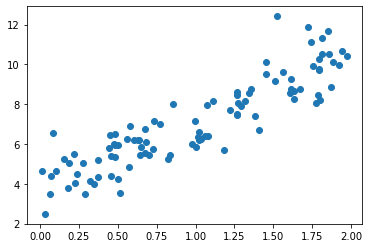

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

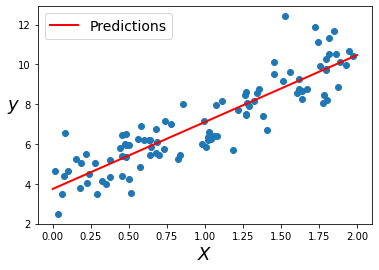

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new= np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new= linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m= 100
X= 6 * np.random.rand(m, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

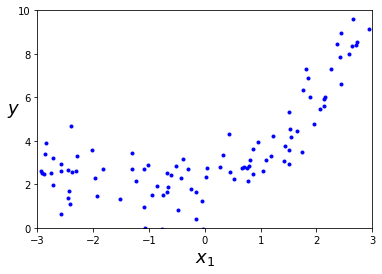

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

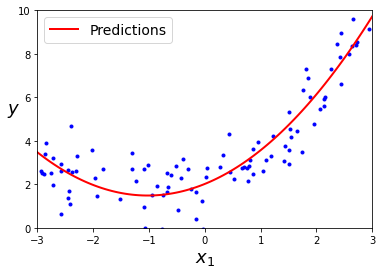

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
import pandas as pd
URL= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 08/EconomiesOfScale.csv'
df= pd.read_csv(URL, )
display(df.sample(10))
display(df.info())

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


None

In [101]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [102]:
len(X)

1000

In [103]:
display(y.describe)

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

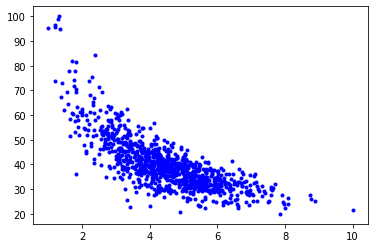

In [104]:
plt.plot(X,y,'b.')


---

---

In [105]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Divide los datos del costo de manufactura.
# Utiliza la función train_test_split (viene el ejemplo al final del notebook).

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)
print('\tX_tv:  ',X_tv.shape)
print('\tX_test:',X_test.shape)
print('\ty_tv:  ',y_tv.shape)
print('\ty_test:',y_test.shape)

	X_tv:   (900, 1)
	X_test: (100, 1)
	y_tv:   (900,)
	y_test: (100,)



---

---

In [30]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Regresión Lineal.
# Realiza la regresión lineal.

regresion_lineal= LinearRegression(fit_intercept= True)
regresion_lineal.fit(X_tv, y_tv)
X_fit= X_test
y_fit= linear_reg.predict(X_fit)
regresion_lineal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LinearRegression()

In [31]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Modelo generado (ecuación).

lin_coef, lin_inter= regresion_lineal.coef_, regresion_lineal.intercept_
print('Ecuación: y=',round(lin_coef[0],2),'X +',round(lin_inter,2))

Ecuación: y= -5.99 X + 66.84


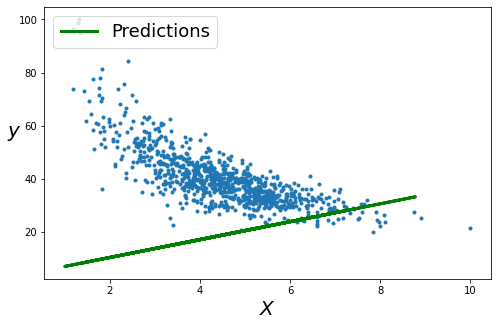

In [32]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Visualización.

plt.figure(figsize= (8,5))
plt.scatter(X_tv, y_tv, cmap= 100, marker= '.')
plt.plot(X_fit, y_fit, "r-", linewidth=3, label="Predictions", color= 'green')
plt.xlabel("$X$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.legend(loc="upper left", fontsize=18)

In [33]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Errores.

MAE_lin= mean_absolute_error(y_test, y_fit)
print('\t    Mean Absolute Error:',round(MAE_lin,2))
RMSE_lin= np.square(mean_squared_error(y_test, y_fit))
print('\tRoot Mean Squared Error:',round(RMSE_lin,2))

	    Mean Absolute Error: 21.53
	Root Mean Squared Error: 479967.11


In [128]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# R cuadrada.

r2_lin= r2_score(y_test, y_fit)
print('\t\t     R cuadrada:',round(r2_lin,2))

		     R cuadrada: -4.32



---

---


In [35]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Regresión Polinomial.
# Realiza la regresión polinomial completa.

poly_features= PolynomialFeatures(degree=2, include_bias=False)
X_tv_poly= poly_features.fit_transform(X_tv)
X_tv_poly= pd.DataFrame(X_tv_poly)
X_tv_poly.columns= ['X0','X1']

print('X_tv_poly:')
display(X_tv_poly)

regresion_lineal_poly= LinearRegression(fit_intercept= True)
regresion_lineal_poly.fit(X_tv_poly, y_tv)

X_tv_poly:


,X0,X1
0,7.974248,63.588625
1,1.895731,3.593795
2,3.576501,12.791362
3,5.561688,30.932371
4,3.278806,10.750566
...,...,...
895,4.688092,21.978206
896,5.692784,32.407790
897,3.940463,15.527249
898,4.524484,20.470958


LinearRegression()

In [36]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Modelo generado (ecuación).

lin_coef, lin_inter= regresion_lineal_poly.coef_, regresion_lineal_poly.intercept_
print('Ecuación: y=',round(lin_coef[0],2),'X +',round(lin_coef[1],2),'X² +',round(lin_inter,2))

Ecuación: y= -16.41 X + 1.13 X² + 88.8


In [37]:
X_fit_poly= poly_features.fit_transform(X_test)
X_fit_poly= pd.DataFrame(X_fit_poly)
X_fit_poly.columns= ['X0', 'X1']
print('X_fit_poly:')
display(pd.DataFrame(X_fit_poly))
y_fit_poly= regresion_lineal_poly.predict(X_fit_poly)
#y_fit_poly= pd.DataFrame(y_fit_poly)
#print('y_fit_poly:')
#display(y_fit_poly)

X_fit_poly:


,X0,X1
0,4.591665,21.083388
1,3.769674,14.210442
2,2.866500,8.216821
3,5.684718,32.316014
4,3.294658,10.854769
...,...,...
95,3.514743,12.353416
96,4.225077,17.851272
97,5.484125,30.075626
98,4.126948,17.031698


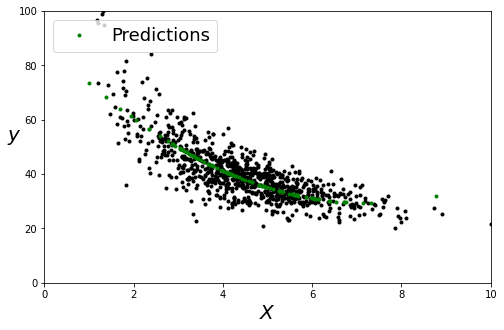

In [38]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Visualización.

plt.figure(figsize= (8,5))
plt.plot(X_tv, y_tv, "b.", color="black")
plt.plot(X_test, y_fit_poly, "b.", linewidth=1, label="Predictions", color= 'green')
plt.xlabel("$X$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.legend(loc="upper left", fontsize=18)
plt.axis([0, 10, 0, 100]);

In [39]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Errores.

MAE_poly= mean_absolute_error(y_test, y_fit_poly)
print('\t    Mean Absolute Error:',round(MAE_poly,2))
RMSE_poly= np.square(mean_squared_error(y_test, y_fit_poly))
print('\tRoot Mean Squared Error:',round(RMSE_poly,2))

	    Mean Absolute Error: 4.38
	Root Mean Squared Error: 1157.44


In [129]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# R cuadrada.

r2_poly= r2_score(y_test, y_fit_poly)
print('\t\t     R cuadrada:',round(r2_poly,2))

		     R cuadrada: 0.74


---
---

In [120]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Regresión Polinomial.
# Realiza la regresión polinomial completa.

def lasso_ridge_(X_tv, X_test, y_tv, y_test, ajuste_, alpha_):
  if ajuste_== 'l':
    print('Ajustando modelo de regresión con: Lasso')
    ajuste = Lasso(alpha=alpha_, fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
    ajuste.fit(X_tv, y_tv)
  elif ajuste_== 'r':
    print('Ajustando modelo de regresión con: Ridge')
    ajuste = Ridge(alpha=alpha_, fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
    ajuste.fit(X_tv, y_tv)

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Modelo generado (ecuación).
  lin_coef, lin_inter= ajuste.coef_, ajuste.intercept_
  df_lin_coef= pd.DataFrame(lin_coef)
  #df_lin_inter= pd.DataFrame(lin_inter)
  nombres_columnas= []
  ecuacion= []
  ecua=''
  for i in df_lin_coef:
    exponente= i+1
    nombres_columnas.append('X^'+str(exponente))
    coeficiente= round(df_lin_coef[i][0],2)
    ecuacion.append(str(coeficiente)+' X^'+str(exponente)+' + ')
    ecua= ecua + ecuacion[i]
    i= i+1
  ecuacion.append(str(lin_inter))
  ecua= ecua + str(lin_inter)
  print('Ecuación:\n', ecua, '\n')
  df_lin_coef.columns= nombres_columnas
  print('lin_coef'); display(round(df_lin_coef,2))
  #df_lin_inter.columns= ['Coeficiente']
  print('lin_inter'); display(round(lin_inter,2))
  print('\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Calculando predicciones
  #X_fit_= poly_features.fit_transform(X_test)
  X_fit_= pd.DataFrame(X_test)
  y_fit_= ajuste.predict(X_fit_)

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Visualización.
  plt.figure(figsize= (8,5))
  plt.plot(X_tv, y_tv, "b.", color="green")
  plt.plot(X_test, y_fit_poly, "b.", linewidth=1, color= 'purple')
  plt.xlabel("$X$", fontsize=20)
  plt.ylabel("$y$", rotation=0, fontsize=20)
  plt.legend(loc="upper left", fontsize=18)
  print('\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Errores.
  MAE= mean_absolute_error(y_test, y_fit_)
  print('\t    Mean Absolute Error:',round(MAE,2),'\n')
  RMSE= np.square(mean_squared_error(y_test, y_fit_))
  print('\tRoot Mean Squared Error:',round(RMSE,2),'\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # R cuadrada.
  r2= r2_score(y_test, y_fit_poly)
  print('\t\t     R cuadrada:',round(r2,2))
  print('\n')

  return MAE, RMSE, r2

-------------------------------------------------------

Ajustando modelo de regresión con: Lasso
Ecuación:
 -0.32 X^1 + 41.487394975278356 

lin_coef


,X^1
0,-0.32


lin_inter


41.49



	    Mean Absolute Error: 7.87 

	Root Mean Squared Error: 14950.8 

		     R cuadrada: 0.74




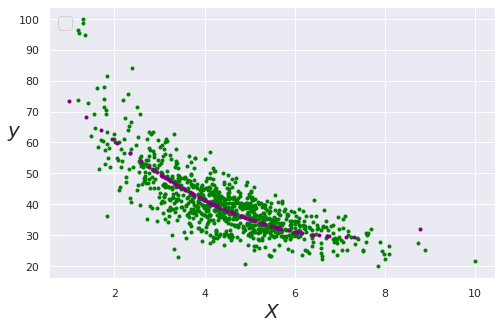

In [142]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Realiza la regresión con Lasso.
# Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

print('-------------------------------------------------------\n')
MAE_lasso, RMSE_lasso, r2_lasso= lasso_ridge_(X_tv, X_test, y_tv, y_test, 'l', 10)

-------------------------------------------------------

Ajustando modelo de regresión con: Ridge
Ecuación:
 -5.95 X^1 + 66.66888334948531 

lin_coef


,X^1
0,-5.95


lin_inter


66.67





	    Mean Absolute Error: 5.02 

	Root Mean Squared Error: 2560.32 

		     R cuadrada: 0.74




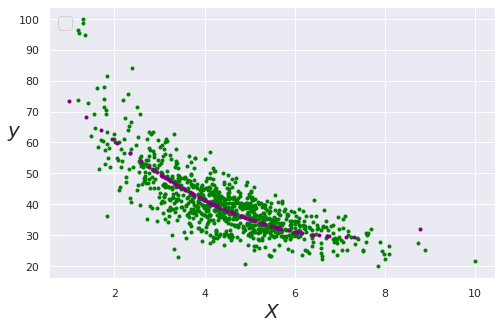

In [143]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Realiza la regresión con Ridge.
# Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

print('-------------------------------------------------------\n')
MAE_ridge, RMSE_ridge, r2_ridge= lasso_ridge_(X_tv, X_test, y_tv, y_test, 'r', 10)

Nombre modelos: ['Lineal', 'Polinomial', 'Lasso', 'Ridge']
MAE: [21.53, 4.38, 7.87, 5.02]
r2: [-4.32, 0.74, 0.74, 0.74]


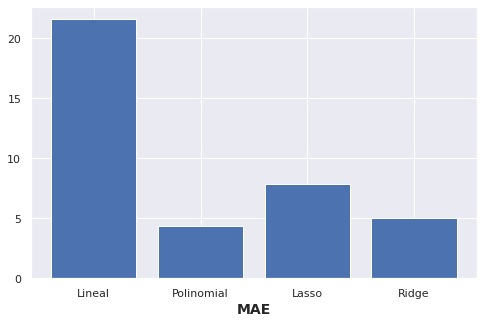

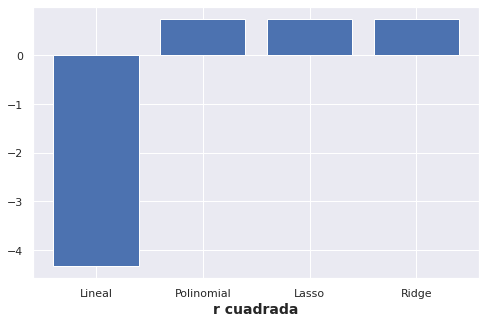

In [150]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Gráficar MAE y R2

nombres= ['Lineal', 'Polinomial', 'Lasso', 'Ridge']
MAE= [round(MAE_lin,2), round(MAE_poly,2), round(MAE_lasso,2), round(MAE_ridge,2)]
r2= [round(r2_lin,2), round(r2_poly,2), round(r2_lasso,2), round(r2_ridge,2)]

print('Nombre modelos:',nombres)
print('MAE:',MAE)
print('r2:',r2)

plt.figure(figsize= (8,5))
plt.bar(nombres, MAE)
plt.xlabel('MAE', fontweight ='bold', fontsize = 14)
plt.show()

plt.figure(figsize= (8,5))
plt.bar(nombres, r2)
plt.xlabel('r cuadrada', fontweight ='bold', fontsize = 14)
plt.show()

---
---


##Explica tus resultados:

- ¿Qué método se aproxima mejor?

  R.

- ¿Por qué?

  R.

- ¿Qué porcentajes de entrenamiento y evaluación usaste?

  R.

- ¿Que error tienes?

  R.

- ¿Es bueno?

  R.

- ¿Cómo lo sabes?

  R.


**Conclusiones:**


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


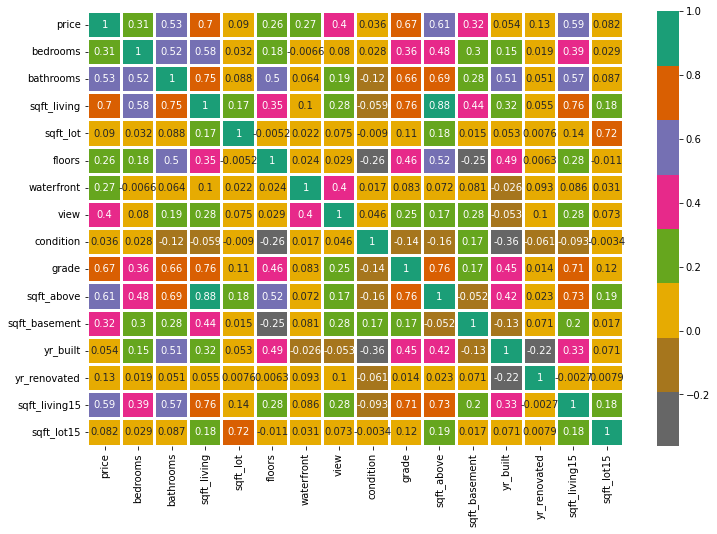

In [45]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [46]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [48]:
from sklearn.model_selection import train_test_split

def train_tv_split_(X, y, ts, rs):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = rs)

  print(f'Numero total de registros en la bdd: {len(X)}')
  print("*****"*10)
  print(f'Numero total de registros en el training set: {len(X_train)}')
  print(f'Tamaño de X_train: {X_train.shape}')
  print("*****"*10)
  print(f'Mumero total de registros en el test dataset: {len(X_test)}')
  print(f'Tamaño del X_test: {X_test.shape}')
  return X_train, X_test, y_train, y_test

X_entrena, X_prueba, y_entrena, y_prueba= train_tv_split_(X, y, 0.1, 101)

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Ecuación:
 933912.83 X^1 + -1093307.3 X^2 + -456.45 X^3 + -27.87 X^4 + -2074072.38 X^5 + -3954318.7 X^6 + -288638.03 X^7 + 558697.57 X^8 + 1098645.1 X^9 + -219.76 X^10 + -382.03 X^11 + -85963.09 X^12 + -2953.52 X^13 + 3999.66 X^14 + -34.01 X^15 + 957.54 X^16 + 7499.58 X^17 + -13.8 X^18 + -0.02 X^19 + 8577.0 X^20 + -11496.59 X^21 + -306.59 X^22 + -5246.29 X^23 + -5367.88 X^24 + -1.21 X^25 + -14.61 X^26 + -467.1 X^27 + -9.13 X^28 + 17.28 X^29 + 0.22 X^30 + -9634.3 X^31 + 15.39 X^32 + -0.14 X^33 + -25906.73 X^34 + 43370.72 X^35 + 3829.42 X^36 + -1075.93 X^37 + 22297.17 X^38 + 14.43 X^39 + 1.34 X^40 + 503.4 X^41 + -17.08 X^42 + -17.29 X^43 + -0.06 X^44 + 1.56 X^45 + -4.35 X^46 + 4.83 X^47 + 160.3 X^48 + -14.27 X^49 + 13.11 X^50 + 20.73 X^51 + 2.61 X^52 + -4.41 X^53 + -2.21 X^54 + 0.06 X^55 + 3.54 X^56 + 18.82 X^57 + 0.0 X^58 + 0.44 X^59 + -0.1 X^60 + -0.1 X^61 + 0.09 X^62 + 0.15 X^63 + 4.35 X^64 + 4.35 X^65 + 0.01 X^66 + -0.0 X^67 + 0.0 X^68 + 0.0 X^69 + 21611.67 X^70 + -131320.71 X^71 + 1

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,...,X^126,X^127,X^128,X^129,X^130,X^131,X^132,X^133,X^134,X^135
0,933912.83,-1093307.3,-456.45,-27.87,-2074072.38,-3954318.7,-288638.03,558697.57,1098645.1,-219.76,...,23.06,0.41,-2.05,0.02,1.12,0.05,0.0,0.03,0.0,0.0


lin_inter


,Coeficiente
0,80227028.31






	    Mean Absolute Error: 121314.07 

	Root Mean Squared Error: 1.2036227452804816e+21 

		     R cuadrada: 0.78




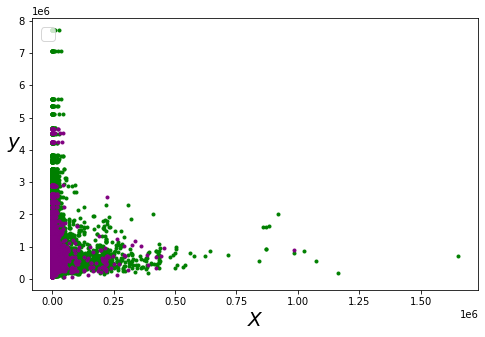

In [97]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Regresión Polinomial.
# Realiza la regresión polinomial completa.

def regresion_polinomial_(X_tv, X_test, y_tv, y_test, drgree_):
  poly_features= PolynomialFeatures(degree=drgree_, include_bias=False)
  X_tv_poly= poly_features.fit_transform(X_tv)
  X_tv_poly= pd.DataFrame(X_tv_poly)
  #X_tv_poly.columns= ['X0','X1']

  #print('X_tv_poly:')
  #display(X_tv_poly)

  regresion_lineal_poly= LinearRegression(fit_intercept= True)
  regresion_lineal_poly.fit(X_tv_poly, y_tv)

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Modelo generado (ecuación).
  lin_coef, lin_inter= regresion_lineal_poly.coef_, regresion_lineal_poly.intercept_
  df_lin_coef= pd.DataFrame(lin_coef)
  df_lin_inter= pd.DataFrame(lin_inter)
  nombres_columnas= []
  ecuacion= []
  ecua=''
  for i in df_lin_coef:
    exponente= i+1
    nombres_columnas.append('X^'+str(exponente))
    coeficiente= round(df_lin_coef[i][0],2)
    ecuacion.append(str(coeficiente)+' X^'+str(exponente)+' + ')
    ecua= ecua + ecuacion[i]
    i= i+1
  ecuacion.append(str(lin_inter))
  ecua= ecua + str(lin_inter[0])
  print('Ecuación:\n', ecua, '\n')
  df_lin_coef.columns= nombres_columnas
  print('lin_coef'); display(round(df_lin_coef,2))
  df_lin_inter.columns= ['Coeficiente']
  print('lin_inter'); display(round(df_lin_inter,2))
  print('\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Calculando predicciones
  X_fit_poly= poly_features.fit_transform(X_test)
  X_fit_poly= pd.DataFrame(X_fit_poly)
  y_fit_poly= regresion_lineal_poly.predict(X_fit_poly)

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Visualización.
  plt.figure(figsize= (8,5))
  plt.plot(X_tv, y_tv, "b.", color="green")
  plt.plot(X_test, y_fit_poly, "b.", linewidth=1, color= 'purple')
  plt.xlabel("$X$", fontsize=20)
  plt.ylabel("$y$", rotation=0, fontsize=20)
  plt.legend(loc="upper left", fontsize=18)
  print('\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # Errores.
  MAE_poly= mean_absolute_error(y_test, y_fit_poly)
  print('\t    Mean Absolute Error:',round(MAE_poly,2),'\n')
  RMSE_poly= np.square(mean_squared_error(y_test, y_fit_poly))
  print('\tRoot Mean Squared Error:',round(RMSE_poly,2),'\n')

  # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
  # R cuadrada.
  r2= r2_score(y_test, y_fit_poly)
  print('\t\t     R cuadrada:',round(r2,2))
  print('\n')  


regresion_polinomial_(X_entrena, X_prueba, y_entrena, y_prueba, 2)